# Logistic Regression - Predict Which Clients Are More Likely To Subscribe For Term Deposits.

# Directories, Libraries and Data

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Logistic Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Logistic Regression


In [2]:
# Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

# Data fields

1. **age** (numeric)  
2. **job**: type of job
3. **marital**: marital status 
4. **education** 
5. **default**: has credit in default? 
6. **housing**: has housing loan? 
7. **loan**: has personal loan? 
8. **contact**: contact communication type   
9. **month**: last contact month of year
10. **day_of_week**: last contact day of the week   
11. **duration**: last contact duration, in seconds (numeric). *Important note*: this attribute highly affects the output target (e.g., if duration=0 then y="no"). The duration is not known before a call is performed. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
12. **campaign**: number of contacts performed during this campaign and for this client 
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14. **previous**: number of contacts performed before this campaign and for this client (numeric)  
15. **poutcome**: outcome of the previous marketing campaign 
16. **emp.var.rate**: employment variation rate (numeric)  
17. **cons.price.idx**: consumer price index (numeric)  
18. **cons.conf.idx**: consumer confidence index (numeric)  
19. **euribor3m**: euribor 3 month rate (numeric)  
20. **nr.employed**: number of employees (numeric)  

In [3]:
# Data 
df = pd.read_csv("banking.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
# Convert object columns to category if number of unique values is relatively low
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() < df.shape[0] / 2:
        df[col] = df[col].astype('category')

# Memory usage after optimization
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp_var_rate    41188 non-null  float64 
 16  cons_price_idx  41188 non-null  float64 
 17  cons_conf_id

In [6]:
# Checking the unique values present in categorical field
for i in df.columns:
    if df[i].dtype == 'category':
        print(f"col: {i}, unique_vals: \n{df[i].unique()}")
        print()
        print("-" * 100)
        print()

col: job, unique_vals: 
['blue-collar', 'technician', 'management', 'services', 'retired', ..., 'unemployed', 'entrepreneur', 'self-employed', 'unknown', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

----------------------------------------------------------------------------------------------------

col: marital, unique_vals: 
['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']

----------------------------------------------------------------------------------------------------

col: education, unique_vals: 
['basic.4y', 'unknown', 'university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.6y', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

--------------------------------------------

In [7]:
# Changing education column 
col_mapper = {'basic.4y': 'basic', 
              'basic.6y': 'basic', 
              'basic.9y': 'basic', 
              'high.school': 'high school', 
              'illiterate': "illiterate", 
              'professional.course': "professional course", 
              'university.degree': "university degree", 
              'unknown': "unknown"}

df['education'] = df['education'].map(col_mapper)

print(df['education'].value_counts())

education
basic                  12513
university degree      12168
high school             9515
professional course     5243
unknown                 1731
illiterate                18
Name: count, dtype: int64


In [8]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00


In [9]:
df.describe(include=['category'])

,job,marital,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,3,3,3,2,10,5,3
top,admin.,married,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,32588,21576,33950,26144,13769,8623,35563


## Contiguous fields distribution 

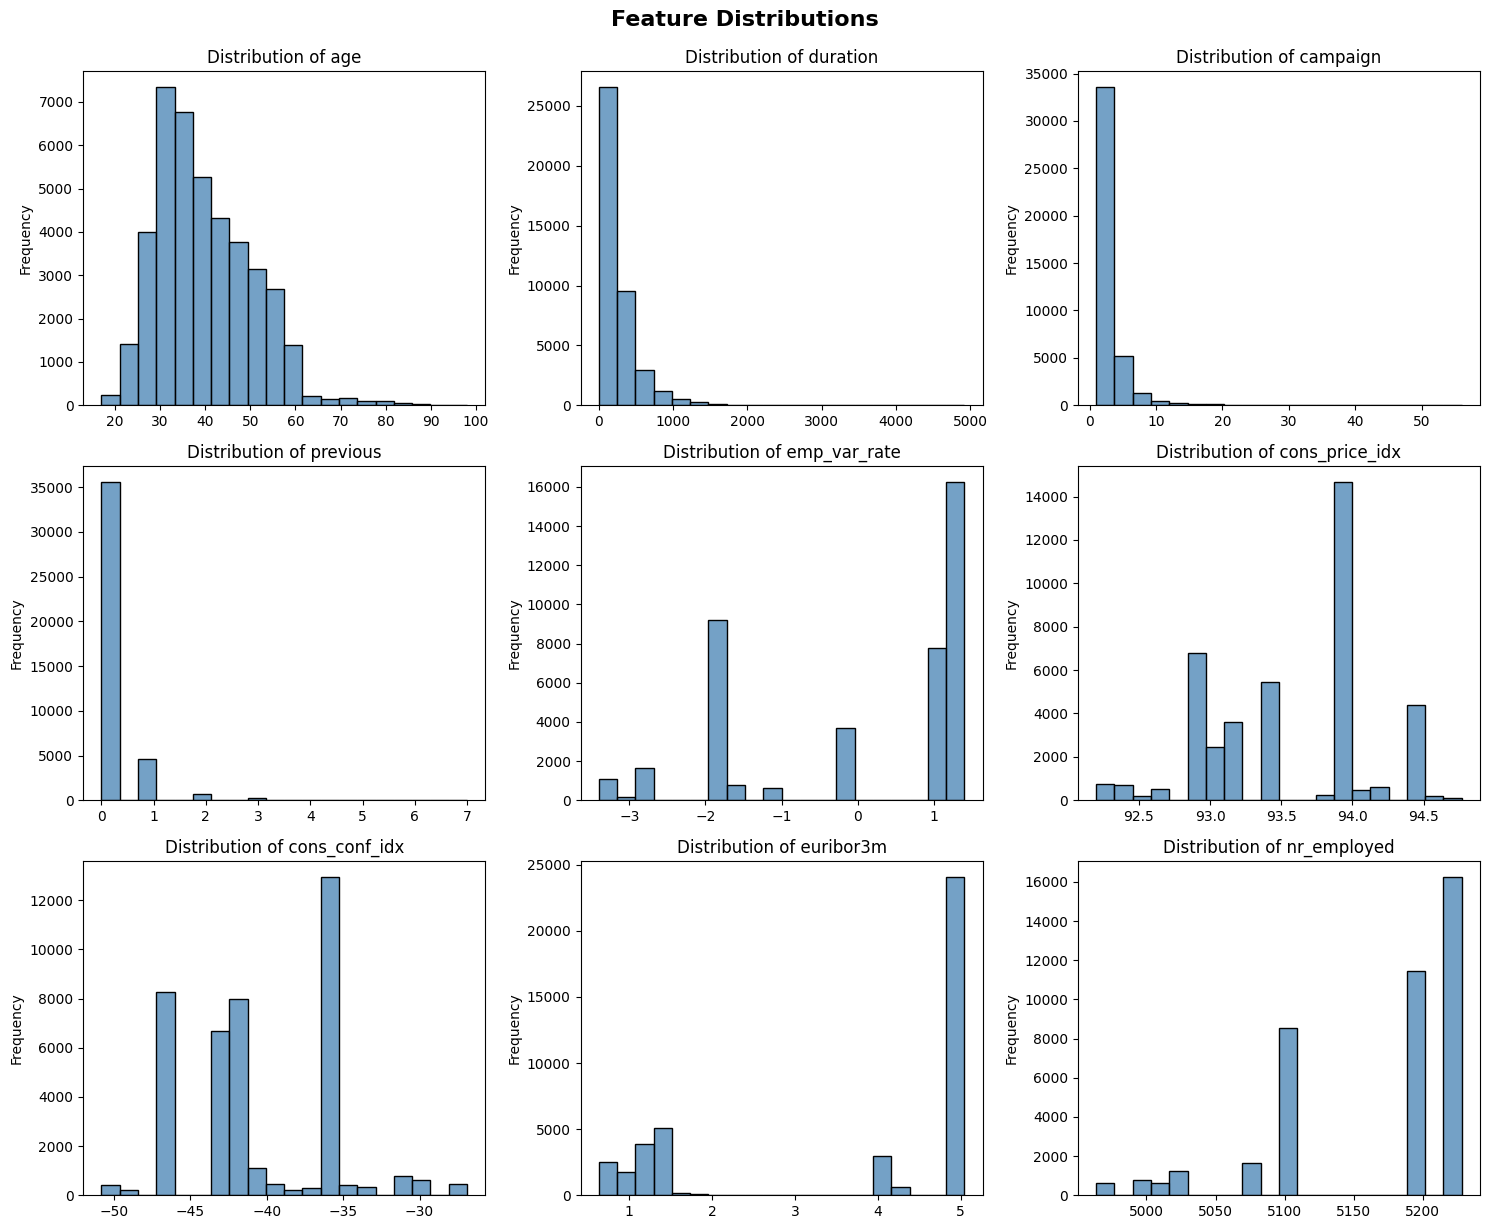

In [10]:
# Set style

# Columns to plot
cols = ["age", "duration", "campaign", "previous", 
        "emp_var_rate", "cons_price_idx", "cons_conf_idx", 
        "euribor3m", "nr_employed"]

# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()  # Flatten for easy iteration

# Plot histograms
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, ax=axes[i], bins=20, color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## Categorical fields distribution

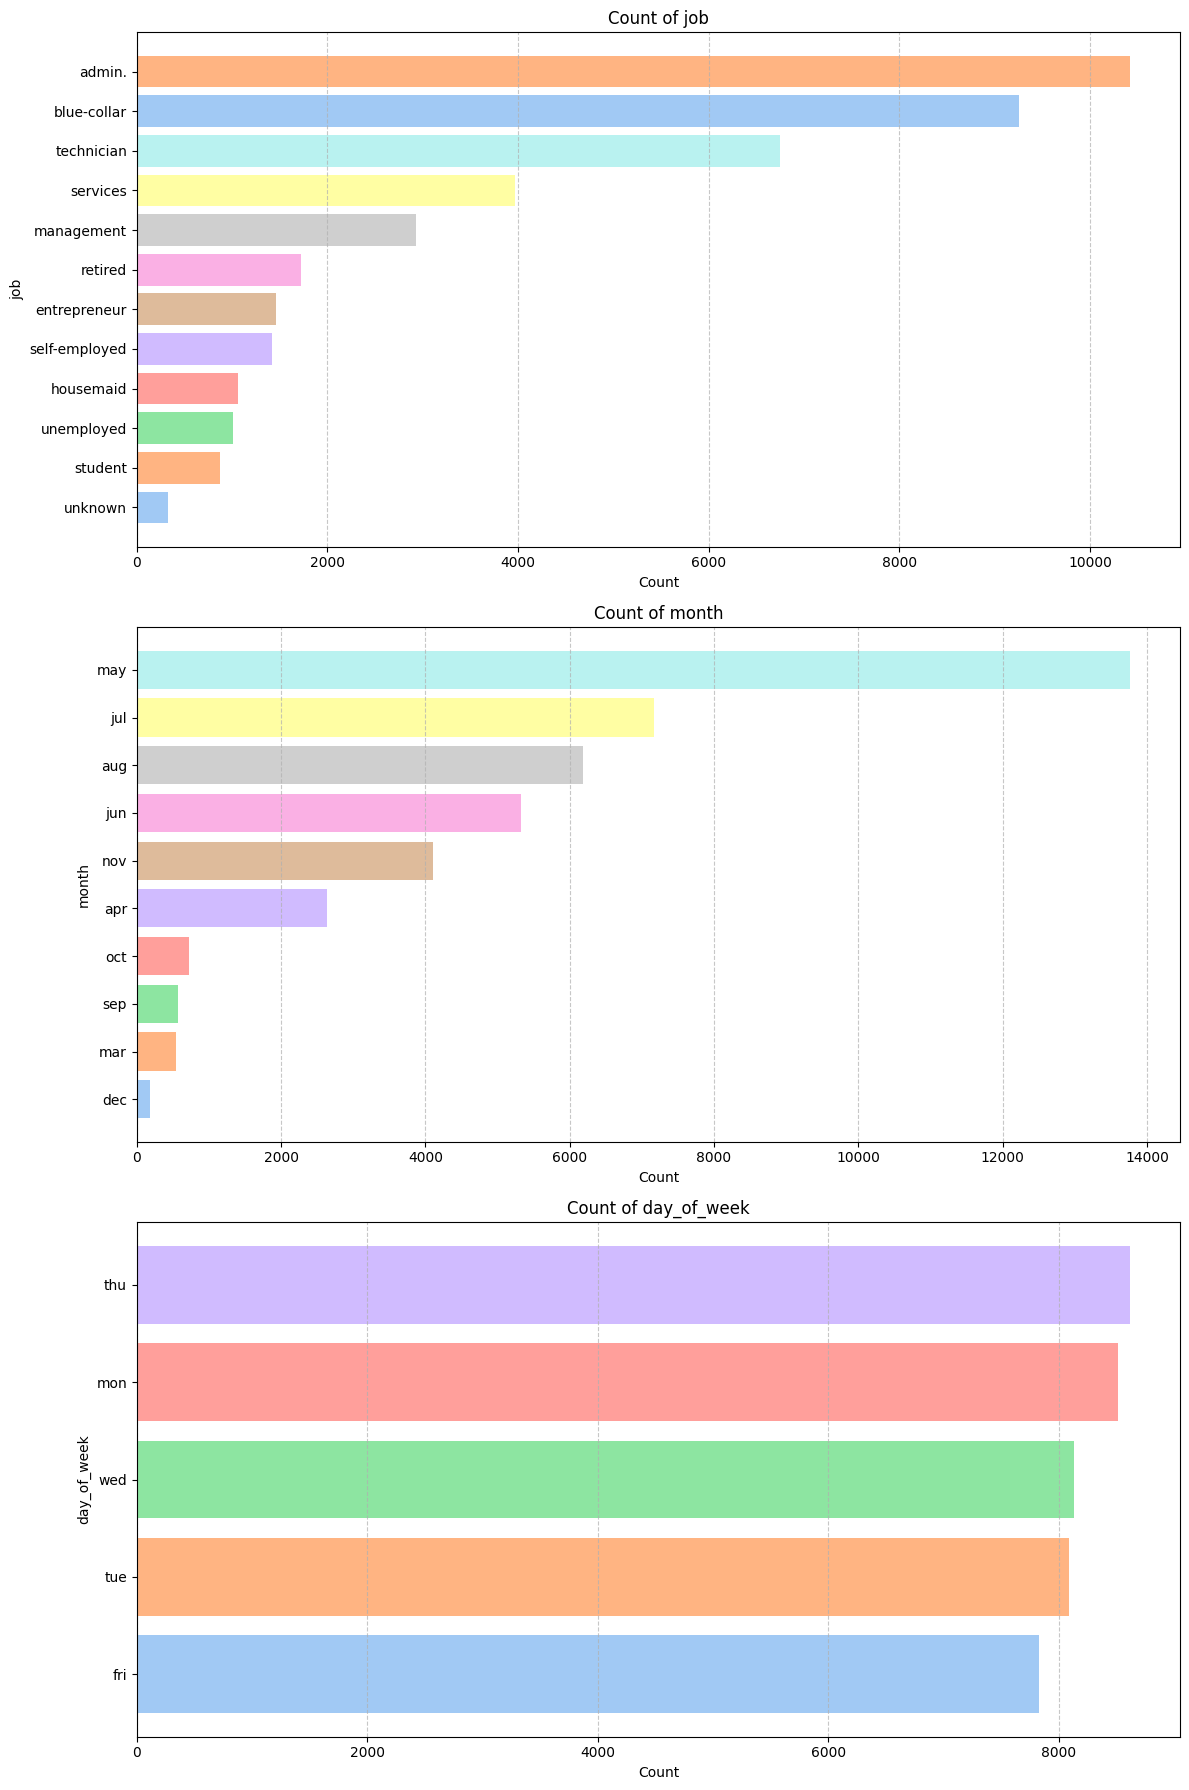

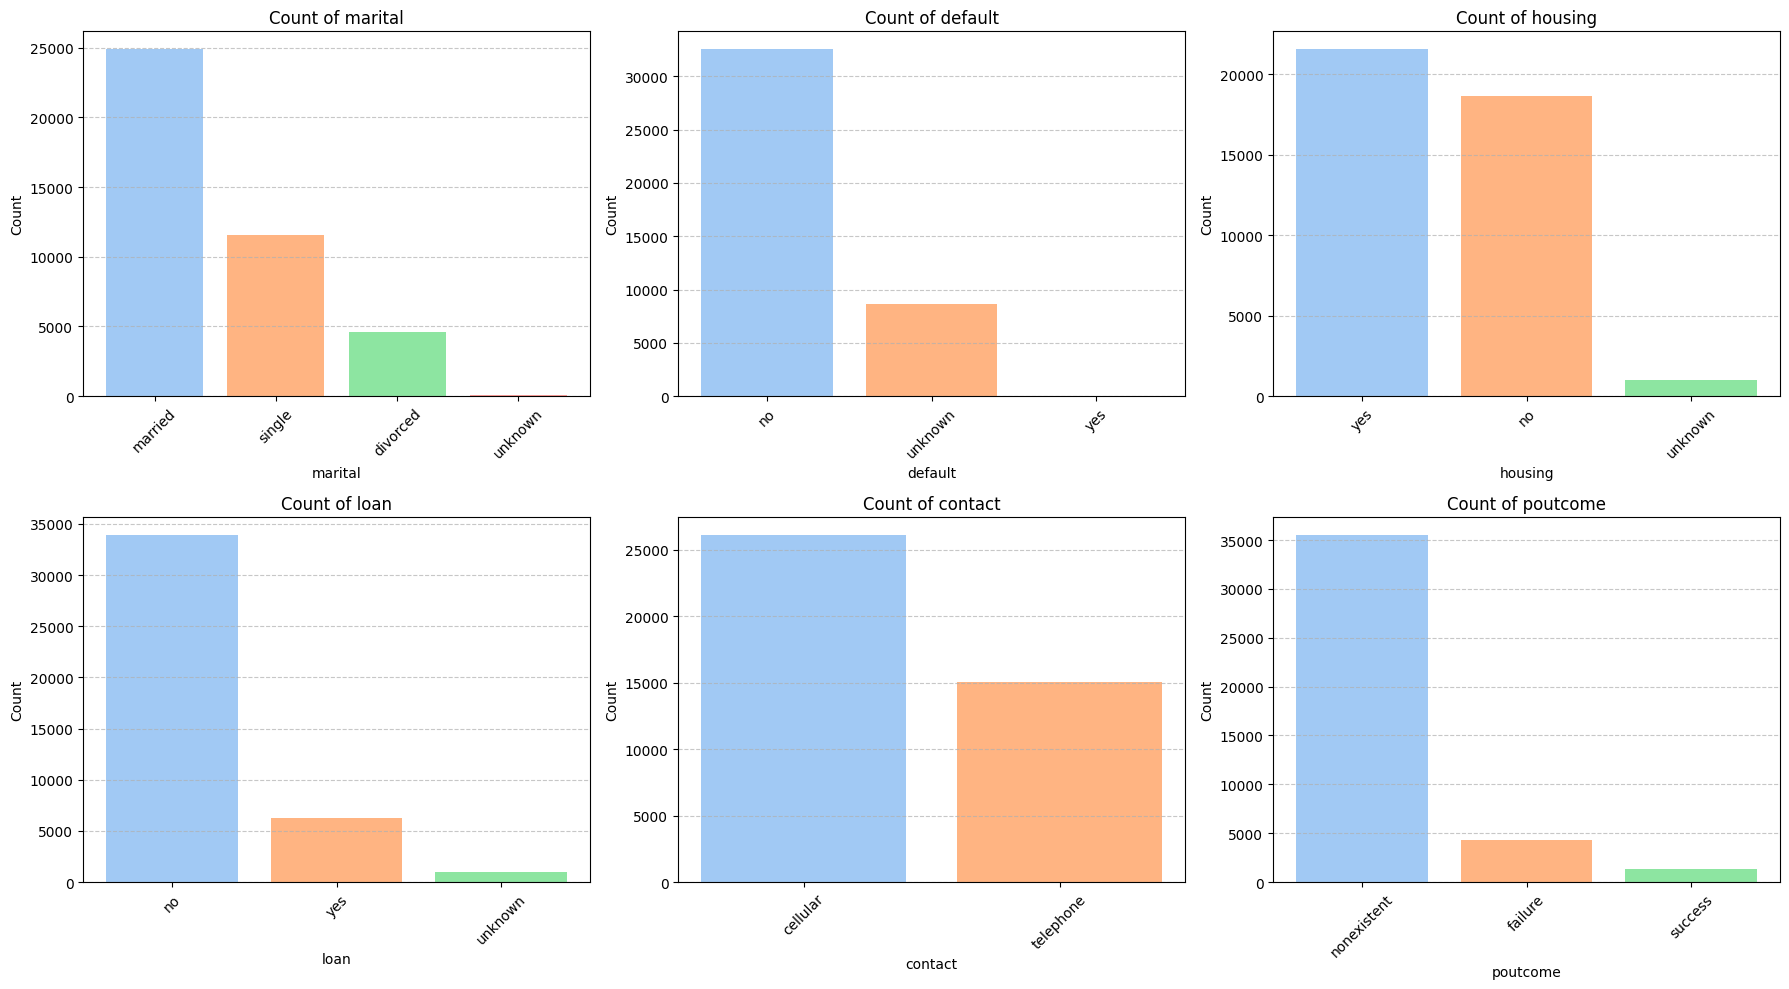

In [11]:
# Categorical features
categorical_features = ["job", "marital", "default", "housing", "loan", "contact", "poutcome", "month", "day_of_week"]

# Split features
horizontal_features = ["job", "month", "day_of_week"]
grid_features = ["marital", "default", "housing", "loan", "contact", "poutcome"]

# --- Horizontal bar plots ---
fig1, axs1 = plt.subplots(3, 1, figsize=(12, 18))

for i, col in enumerate(horizontal_features):
    value_counts = df[col].value_counts().sort_values()
    palette = sns.color_palette("pastel", len(value_counts))
    axs1[i].barh(value_counts.index.astype(str), value_counts.values, color=palette)
    axs1[i].set_title(f'Count of {col}')
    axs1[i].set_xlabel('Count')
    axs1[i].set_ylabel(col)
    axs1[i].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Grid bar plots ---
fig2, axs2 = plt.subplots(2, 3, figsize=(18, 10))
axs2 = axs2.flatten()

for i, col in enumerate(grid_features):
    value_counts = df[col].value_counts().sort_values(ascending=False)
    palette = sns.color_palette("pastel", len(value_counts))
    axs2[i].bar(value_counts.index.astype(str), value_counts.values, color=palette)
    axs2[i].set_title(f'Count of {col}')
    axs2[i].set_xlabel(col)
    axs2[i].set_ylabel('Count')
    axs2[i].tick_params(axis='x', rotation=45)
    axs2[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Mean and Median of long term deposit vs contiguous fields 

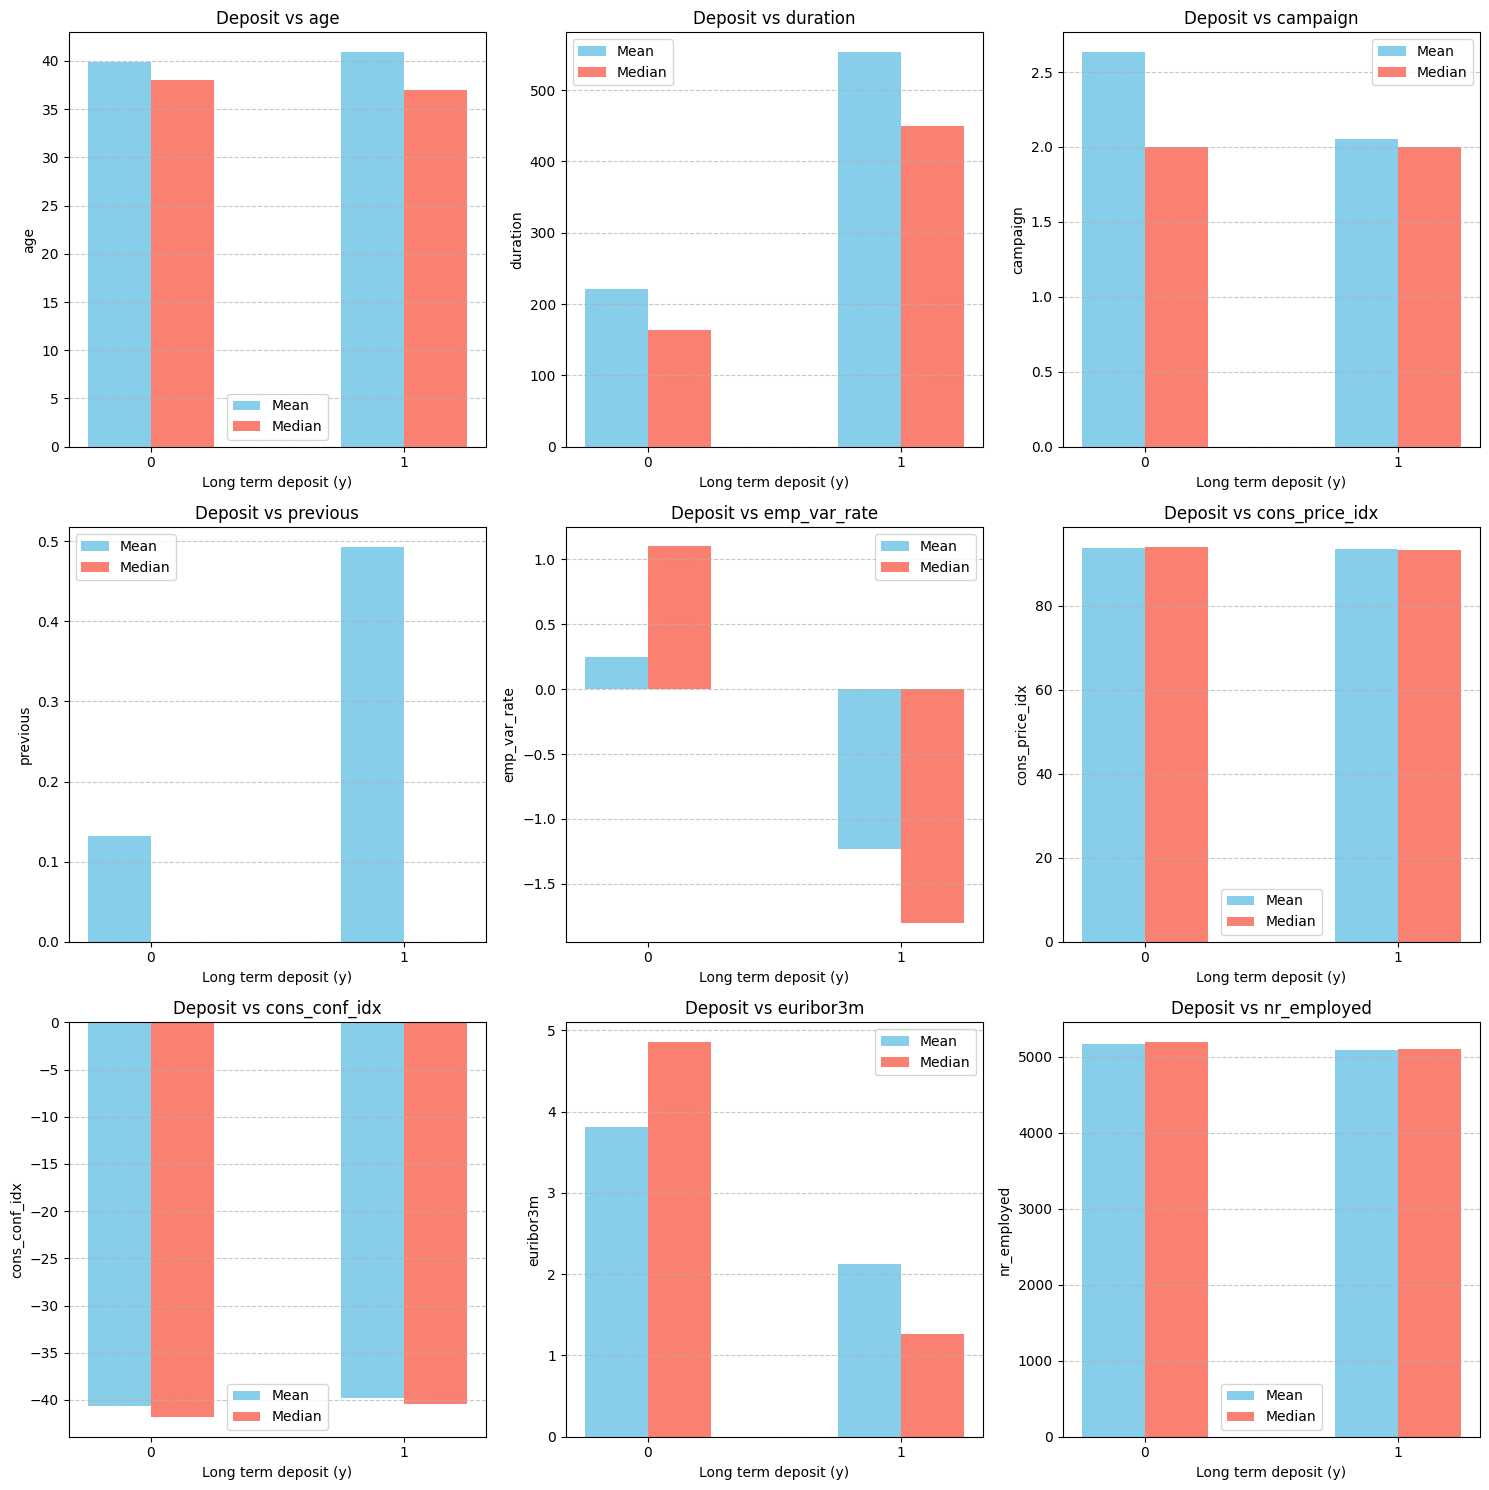

In [12]:
contiguous_features = ["age", "duration", "campaign", "previous", 
                       "emp_var_rate", "cons_price_idx", "cons_conf_idx", 
                       "euribor3m", "nr_employed"]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(contiguous_features):
    mean_vals = df.groupby('y')[col].mean()
    median_vals = df.groupby('y')[col].median()

    x = range(len(mean_vals))  # [0, 1] for y=0 and y=1
    bar_width = 0.25

    axs[i].bar([xi - bar_width/2 for xi in x], mean_vals, width=bar_width, 
               color='skyblue', label='Mean')
    axs[i].bar([xi + bar_width/2 for xi in x], median_vals, width=bar_width, 
               color='salmon', label='Median')

    axs[i].set_xticks(x)
    axs[i].set_xticklabels(mean_vals.index.astype(str))
    axs[i].set_title(f'Deposit vs {col}')
    axs[i].set_xlabel('Long term deposit (y)')
    axs[i].set_ylabel(col)
    axs[i].legend()
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Target field distribution

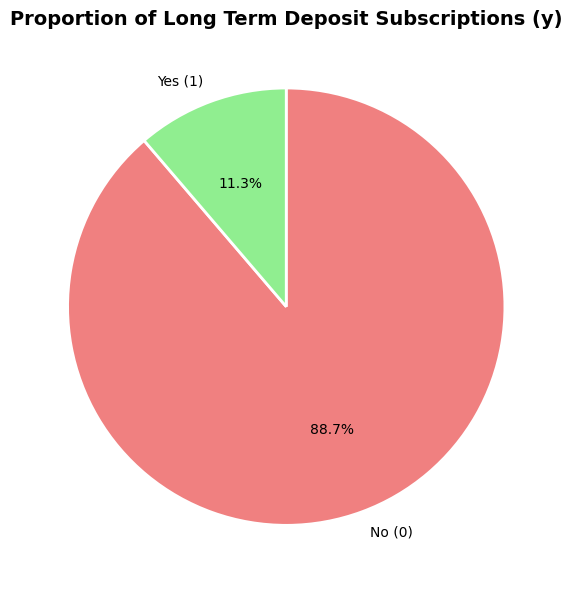

In [13]:
# Count of each class
y_counts = df['y'].value_counts()

# Labels and colors
labels = ['No (0)', 'Yes (1)']
colors = ['lightcoral', 'lightgreen']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(y_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Title and display
plt.title('Proportion of Long Term Deposit Subscriptions (y)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Unbalanced Dataset**

## Average long term deposit vs categorical fields

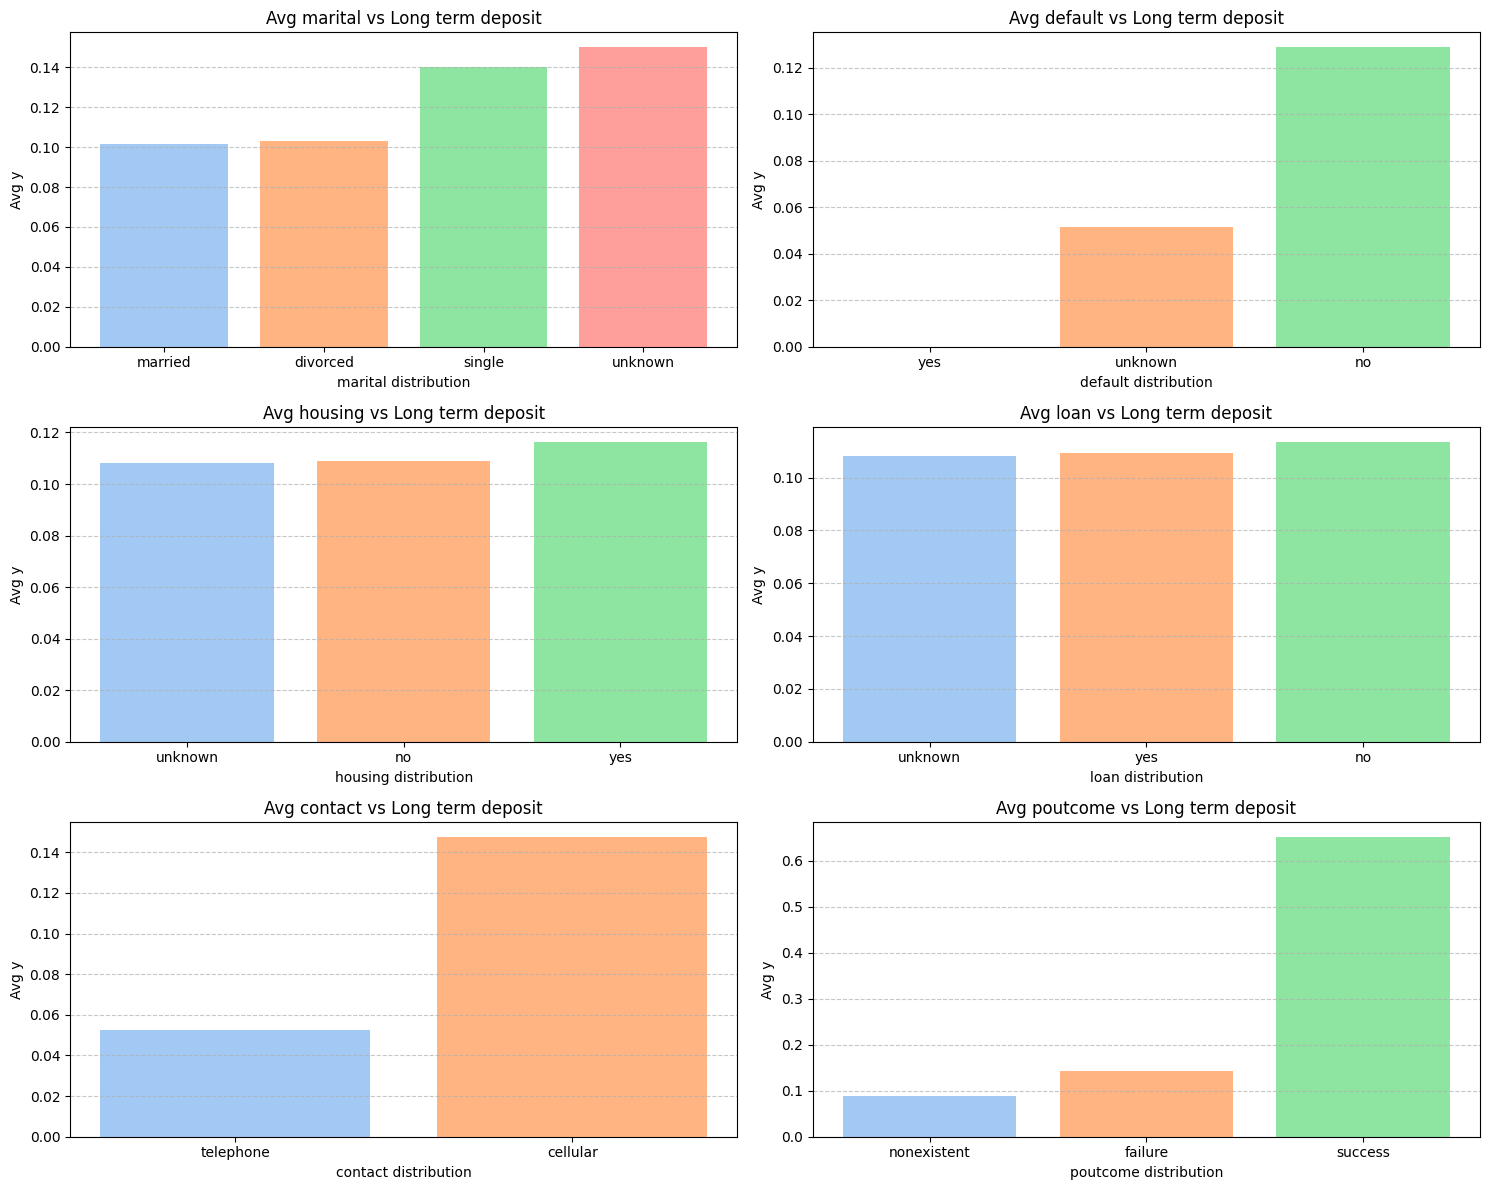

In [14]:
categorical_features = ["marital", "default", "housing", "loan", "contact", "poutcome"]

fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs = axs.flatten()

for i, col in enumerate(categorical_features):
    avg_metric = df.groupby(col, observed=True)['y'].mean().sort_values()
    
    # Get a color palette with as many colors as categories
    palette = sns.color_palette("pastel", n_colors=len(avg_metric))
    
    axs[i].bar(avg_metric.index.astype(str), avg_metric.values, color=palette)
    axs[i].set_title(f'Avg {col} vs Long term deposit')
    axs[i].set_xlabel(f"{col} distribution")
    axs[i].set_ylabel('Avg y')
    axs[i].tick_params(axis='x')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


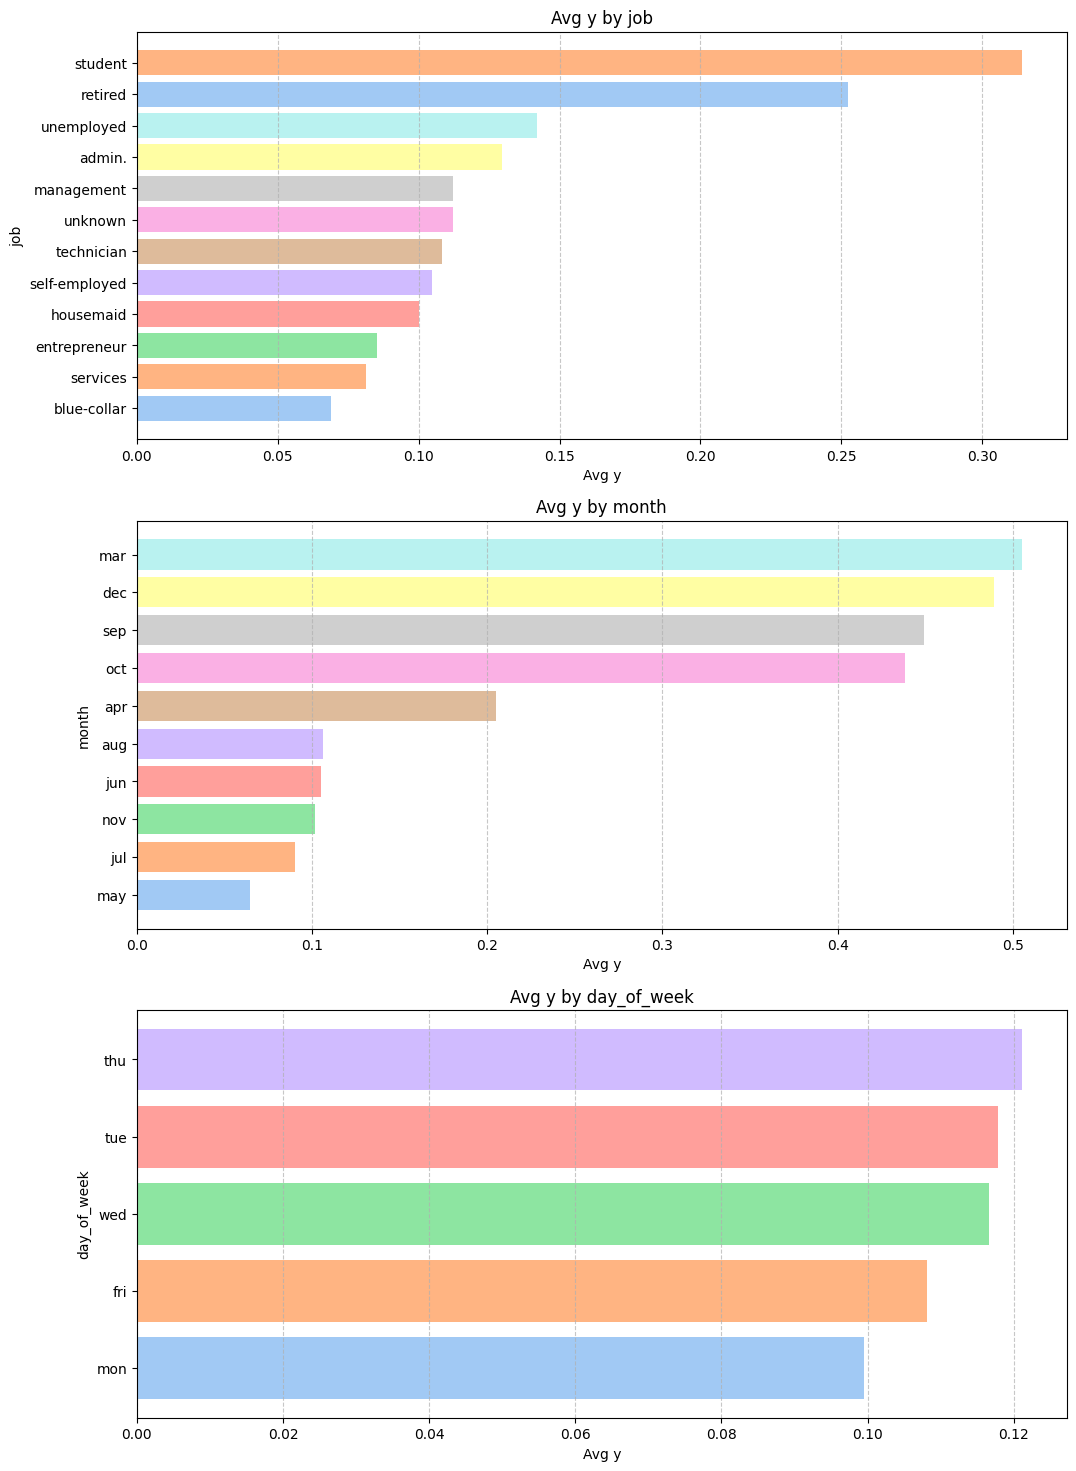

In [15]:
# rest of the categorical fields 

categorical_features = ["job", "month", "day_of_week"]

fig1, axs1 = plt.subplots(3, 1, figsize=(12, 18))
for i, col in enumerate(horizontal_features):
    avg_metric = df.groupby(col, observed=True)['y'].mean().sort_values()
    axs1[i].barh(avg_metric.index.astype(str), avg_metric.values, color=sns.color_palette("pastel", len(avg_metric)))
    axs1[i].set_title(f'Avg y by {col}')
    axs1[i].set_xlabel('Avg y')
    axs1[i].set_ylabel(col)
    axs1[i].grid(axis='x', linestyle='--', alpha=0.7)

## Successful campaigns

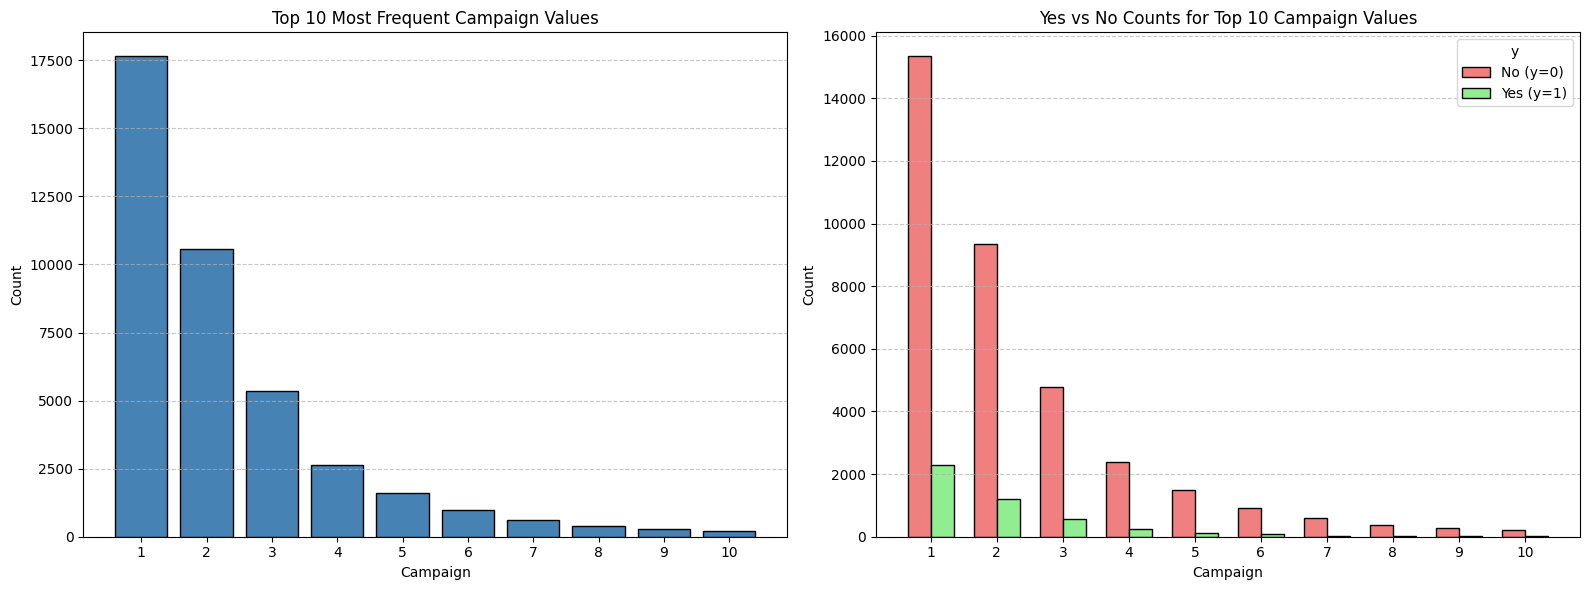

In [16]:
# Step 1: Get top 10 campaign values by count
top_campaigns = df['campaign'].value_counts().nlargest(10)
top_campaign_vals = top_campaigns.index

# Step 2: Filter and prepare y breakdown
campaign_y_counts = (
    df[df['campaign'].isin(top_campaign_vals)]
    .groupby(['campaign', 'y'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=top_campaign_vals)  # Keep the same order as top 10
)

# Step 3: Plot side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Top 10 campaign counts
axes[0].bar(top_campaigns.index.astype(str), top_campaigns.values, color='steelblue', edgecolor='black')
axes[0].set_title('Top 10 Most Frequent Campaign Values')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: Clustered bar for y=0 and y=1
x = np.arange(len(campaign_y_counts))
width = 0.35

axes[1].bar(x - width/2, campaign_y_counts[0], width, label='No (y=0)', color='lightcoral', edgecolor='black')
axes[1].bar(x + width/2, campaign_y_counts[1], width, label='Yes (y=1)', color='lightgreen', edgecolor='black')

axes[1].set_title('Yes vs No Counts for Top 10 Campaign Values')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Count')
axes[1].set_xticks(x)
axes[1].set_xticklabels(campaign_y_counts.index.astype(str))
axes[1].legend(title='y')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Correlation check

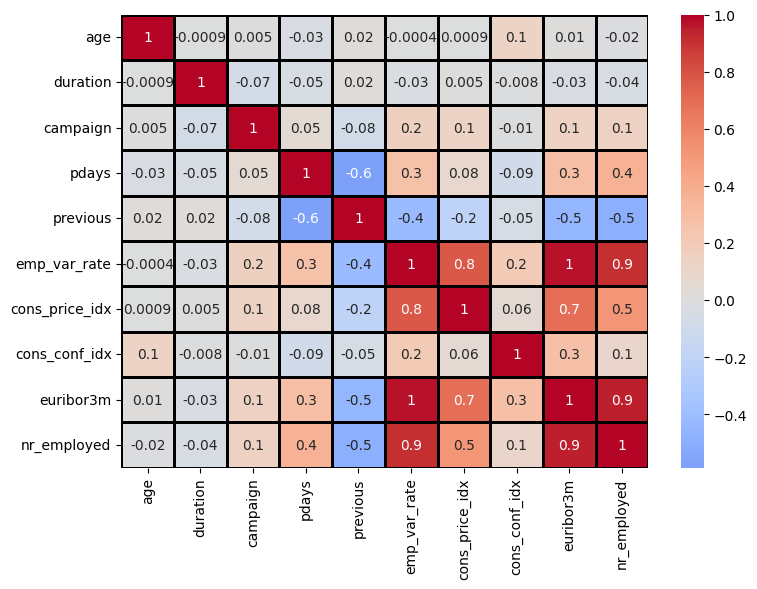

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.drop('y', axis=1).corr(numeric_only=True),
           annot=True,
           fmt='.1g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black').figure.tight_layout()

plt.show()

**Lets remove nr_employed and emp_var_rate to remove multicolinearity**

**Although "duration" feature highly affects the output target, this value is not known before a call is performed. Hence; this feature should been discarded from the list of features to predict.**

# Data prep

In [18]:
df = df.drop(columns=['emp_var_rate', 'nr_employed', "duration"])
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,93.444,-36.1,4.963,0


## Isolate X and y

In [19]:
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32950, 17)
Number transactions y_train dataset:  (32950,)
Number transactions X_test dataset:  (8238, 17)
Number transactions y_test dataset:  (8238,)


# Get dummy variables 

In [20]:
# Separate numeric and categorical fields

numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'category']).columns.values

print(numeric_features)
print(category_features)

['age' 'campaign' 'pdays' 'previous' 'cons_price_idx' 'cons_conf_idx'
 'euribor3m']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [21]:
# impute missing numerical values with a median value, then scale the values

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# impute missing categorical values using the 'missing' and one hot encode the categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Each transformer is a three-element tuple that defines 
#                                 the name of the transformer, 
#                                 the transform to apply, 
#                                 and the column features to apply it to
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [22]:
X_train_t.shape, X_test_t.shape

((32950, 58), (8238, 58))

In [23]:
def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    # list of category columns
    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(columns.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames 
    if hasattr(transformed_array, "toarray"):
        transformed_array = transformed_array.toarray()
    
    # convert numpy array to dataframe
    df = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return transformed_array, df

In [24]:
# transform training and test set and then convert it to dataframe
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

,age,campaign,pdays,previous,cons_price_idx,cons_conf_idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
29321,-0.579855,1.605990,0.195164,-0.351355,-0.644318,-0.320825,0.264337,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23925,-0.963853,1.605990,0.195164,-0.351355,-0.222943,0.954400,0.775827,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39148,-0.483855,-0.204451,0.195164,-0.351355,1.540268,-0.277597,0.778134,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12078,0.380141,-0.566539,0.195164,-0.351355,-1.411081,-1.163770,-0.325578,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41021,0.572140,-0.204451,0.195164,-0.351355,0.726877,0.889558,0.714702,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
X_train_columns = X_train_t.columns
print(X_train_columns)

Index(['age', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic',
       'education_high school', 'education_illiterate',
       'education_professional course', 'education_university degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

## Oversampling using SMOTE

Our data is very unbalanced. Therefore, accuracy is no longer a good measure of performance because if we simply predict all examples to the negative class, we achieve 88,73% accuracy.

In [26]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 29223, 1: 3727})
Counter({0: 29223, 1: 29223})


## Random Feature Elimination - RFE

RFE is a popular feature selection algorithm. It is easy to configure and pretty effective at selecting features in a training dataset. There are two important configuration options when using RFE:

1. The number of features to select.

2. The choice of algorithm used to help choose features.

In [27]:
from sklearn.svm import SVC

final_X_train = pd.DataFrame(data=X_train_smote, columns=X_train_columns )
final_y_train = pd.DataFrame(data=y_train,columns=['y'])

rfe_model = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), n_features_to_select=25)
rfe_model = rfe_model.fit(final_X_train, final_y_train.values.ravel())

# feature selection
print(rfe_model.support_)
print(rfe_model.ranking_)

[False  True  True False  True  True  True  True False False  True False
  True False False  True False False False  True False False False False
 False False False False False False  True False False  True False  True
 False False  True  True False  True False False False  True  True  True
  True  True False  True False False  True  True False  True]
[22  1  1  9  1  1  1  1 33 15  1 14  1  3 12  1 16  6 20  1 26 21 17 13
 32  8 11  4  5 10  1 29 31  1 30  1  2  7  1  1 23  1 28 34 25  1  1  1
  1  1 27  1 18 19  1  1 24  1]


In [28]:
selected_columns = X_train_columns[rfe_model.support_]
print(selected_columns.tolist())

['campaign', 'pdays', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'job_admin.', 'job_housemaid', 'job_retired', 'job_student', 'marital_divorced', 'default_unknown', 'housing_unknown', 'loan_no', 'contact_cellular', 'contact_telephone', 'month_aug', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_wed', 'poutcome_failure', 'poutcome_success']


In [29]:
X_train_final = final_X_train[selected_columns.tolist()]
y_train_final = final_y_train['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,campaign,pdays,cons_price_idx,cons_conf_idx,euribor3m,job_admin.,job_housemaid,job_retired,job_student,marital_divorced,...,month_aug,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_wed,poutcome_failure,poutcome_success
15500,0.519726,0.195164,-0.860186,-1.423138,-1.275900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29034,0.157637,0.195164,-0.860186,-1.423138,-1.240724,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11199,-0.204451,0.195164,0.595629,-0.472123,0.775251,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22247,-0.566539,0.195164,1.540268,-0.277597,0.774674,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27180,-0.566539,0.195164,-0.644318,-0.320825,0.232621,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression Model Fitting

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [31]:
y_pred = logreg.predict(X_test_final)
y_pred[:4]

array([1, 0, 0, 0], dtype=int64)

## Confusion Matrix

In [32]:
print(confusion_matrix(y_test_final, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test_final, y_pred).ravel()


[[6085 1240]
 [ 330  583]]


## Classification Report 

In [33]:
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7325
           1       0.32      0.64      0.43       913

    accuracy                           0.81      8238
   macro avg       0.63      0.73      0.66      8238
weighted avg       0.88      0.81      0.83      8238

